<a href="https://colab.research.google.com/github/AlessandroSerra/ML_Projects/blob/main/TreeFull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

Esempio di Regression Tree utilizzando un segnale sinusoidale sporcato

In [ ]:
rng = np.random.RandomState(1)

# usiamo il methodo rand(min,max) che fornisce numeri random in un range 0,1 in un certo formato
# In questo caso un array 80 x 1 (quindi 80 valori singoli)

X = np.sort(5*rng.rand(80,1), axis = 0)

# ravel produce un array flat
y = np.sin(X).ravel()

# Prendiamo ogni quinto elemento
y[::5] += 3 * (0.5 - rng.rand(16))

In [ ]:
y

array([-1.1493464 ,  0.09131401,  0.09668352,  0.13651039,  0.19403525,
       -0.12383814,  0.26365828,  0.41252216,  0.44546446,  0.47215529,
       -0.26319138,  0.49351799,  0.60530013,  0.63450933,  0.64144608,
        1.09900119,  0.66957978,  0.66968122,  0.73574834,  0.75072053,
        1.4926134 ,  0.8363043 ,  0.8532893 ,  0.87144496,  0.97060533,
       -0.20183403,  0.99131122,  0.99472837,  0.99825213,  0.99999325,
        1.21570343,  0.98769965,  0.98591565,  0.9159044 ,  0.91406986,
       -0.51669013,  0.8775346 ,  0.87063055,  0.86993408,  0.86523559,
        0.37007575,  0.78464608,  0.63168655,  0.53722799,  0.45801971,
        0.08075119,  0.43272116,  0.34115328,  0.26769953,  0.20730318,
        1.34959235, -0.17645185, -0.20918837, -0.24990778, -0.28068224,
       -1.63529379, -0.31247075, -0.31458595, -0.32442911, -0.34965155,
       -0.29371122, -0.46921115, -0.56401144, -0.57215326, -0.57488849,
       -0.95586361, -0.75923066, -0.78043659, -0.85808859, -0.94

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

DecisionTreeRegressor(max_depth=8)

In [ ]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

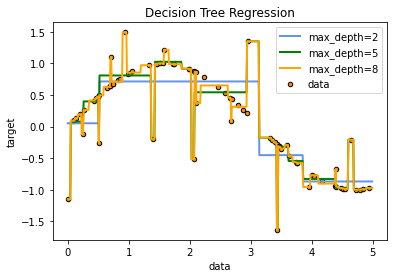

In [ ]:
#plot the results

plt.figure()
plt.scatter(X, y,s=20,edgecolor='black',c='darkorange',label='data')
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="green", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="orange", label="max_depth=8", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Esempio di Classification Tree mediante il dataset Iris

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

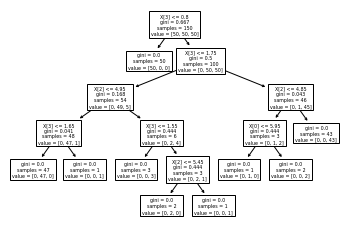

In [ ]:
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

Utilizziamo ora il pruning su un dataset di cancro al seno


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer_data = load_breast_cancer(as_frame=True)
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# cancer data e' un "bunch" di pandas
cancer_data.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Importiamolo ora invece che come dataframe come arrays
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
clf.score(X_test, y_test)

0.8811188811188811

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#cost_complexity_pruning_path restituisce il percorso di pruning per un insieme di tree

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

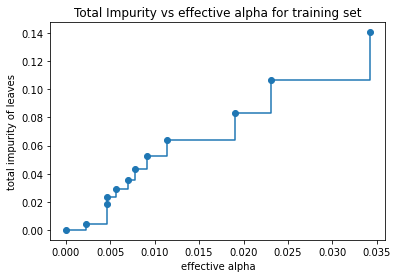

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
#creiamo un insieme di tree che segua il path trovato in precedenza

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
"Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


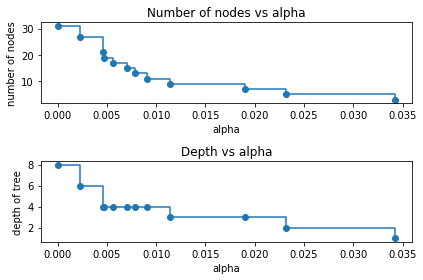

In [ ]:
#questo metodo lascia l'ultimo tree con un solo nodo, di conseguenza può essere eliminato.
#in generale all'aumentare di alpha diminuiscono il numero di nodi

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]    #conteggio di nodi
depth = [clf.tree_.max_depth for clf in clfs]

#plottiamo l'andamento dei nodi e della profondità in funzione di alpha
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

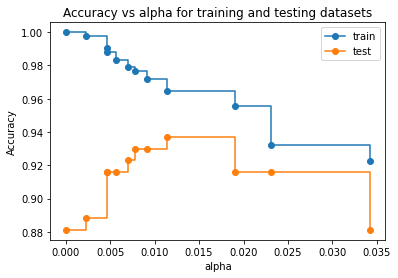

In [ ]:
#plottiamo l'andamento del fit score in funzione di alpha

train_score = [clf.score(X_train, y_train) for clf in clfs]
test_score = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs alpha for training and testing datasets')
ax.plot(ccp_alphas, train_score, label='train', marker='o', drawstyle="steps-post")
ax.plot(ccp_alphas, test_score, label='test', marker='o', drawstyle='steps-post')
ax.legend()
plt.show()

In [ ]:
prova = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[7])
prova.fit(X_train, y_train)
print('Score train dataset', prova.score(X_train, y_train))
print('Score test dataset', prova.score(X_test, y_test))

Score train dataset 0.971830985915493
Score test dataset 0.9300699300699301


Essendo alpha il parametro di potatura, svolgendo un'analisi come sopra è possibile trovare la dimensione ottimale del tree in modo da non dare overfitting

In [ ]:
'''
BAGGING
Usiamo 500 Decision Tree. Ognuno verra’ allenato su 100 eventi (with replacement, quindi anche replicati nello stesso tree).
Questi eventi verranno presi casualmente dal trainig set usando le stesse variabili in training diversi ( Bootstrap ).
Se volete si puo anche cominciare a parallelizzare dando un valore diverso da 1 a n_jobs (n_jobs = -1 usa tutti i core disponibili).
'''

from sklearn.ensemble import BaggingClassifier

In [ ]:
#mettiamo bootstrap True in modo da ripetere gli eventi nei training datasets
bag_clf_true = BaggingClassifier(DecisionTreeClassifier(ccp_alpha=ccp_alphas[0]), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

In [ ]:
bag_clf_true.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [ ]:
bag_predictions_true = bag_clf_true.predict(X_test)
bag_clf_true.score(X_test, y_test)

0.965034965034965

In [ ]:
#mettiamo bootstrap False in modo da non ripetere gli eventi nei training datasets
bag_clf_false = BaggingClassifier(DecisionTreeClassifier(ccp_alpha=ccp_alphas[7]), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

In [ ]:
bag_clf_false.fit(X_train, y_train)
bag_predictions_false = bag_clf_false.predict(X_test)
bag_clf_false.score(X_test, y_test)

0.965034965034965